In [1]:
import matplotlib.pyplot as plt
import groupby.gcal as gcal
import groupby.twitter as twitter
import groupby.plotters as plotters

<br>
<br>

# Google Calendar

### Open Google Calendar data

In [29]:
fname = 'example data/shsher@uw.edu.ics'
cal_df = gcal._process_calendar(fname)
print(cal_df.head())

    day  month    year  hour                                  event_name  \
0   1.0    1.0  2016.0   0.0                   aditya narayan's birthday   
1  18.0    3.0  2016.0   0.0                         Sri Rama's birthday   
2   1.0    4.0  2016.0   0.0  Anirban Chatterjee BITS (Paanu)'s birthday   
3   3.0    5.0  2016.0   0.0                     Kevin Mathew's birthday   
4   4.0    6.0  2016.0   0.0                   Nishank Shinde's birthday   

   duration  
0   86400.0  
1   86400.0  
2   86400.0  
3   86400.0  
4   86400.0  


### Visualize Google Calendar data

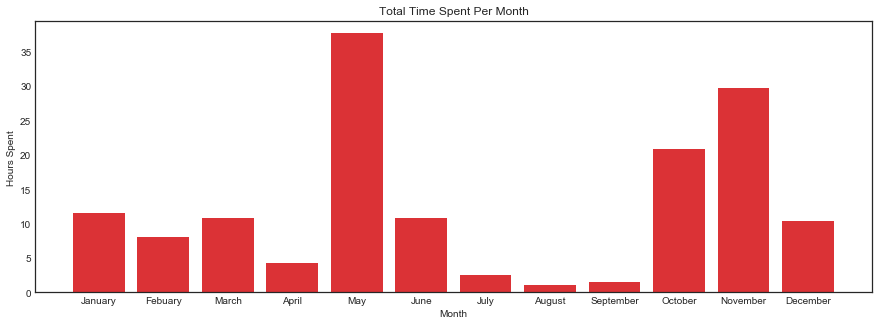

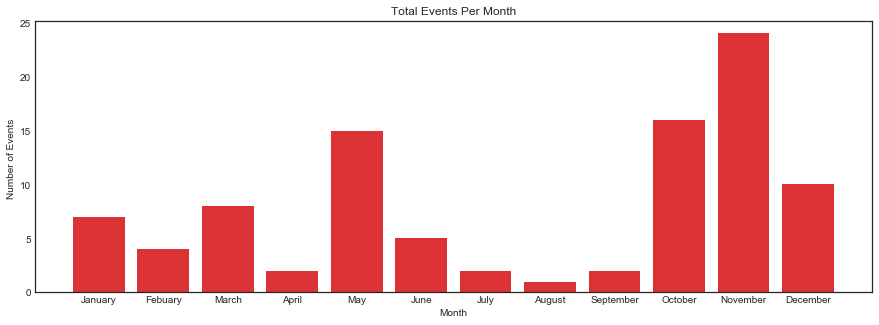

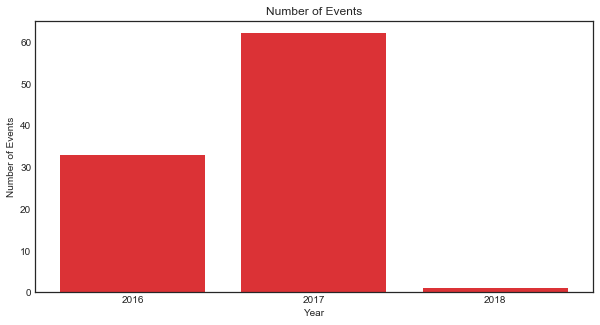

In [30]:
time_per_month, events_per_month, total_events = gcal.get_plots(cal_df)
plt.show()

<br>
<br>

# Twitter 

### Open tweets.csv

(tweets.csv is contained in a typical archive of Twitter data)

In [31]:
fname = 'example data/tweets.csv'
tweets_df = twitter.open_tweets(fname)

In [32]:
print(tweets_df.head())

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  796200994883321856                    NaN          424660548.0   
1  796184749505056768                    NaN          424660548.0   
2  789021742584868865           7.881535e+17           19441507.0   
3  788123399709073408           7.881231e+17          746505302.0   
4  788123081583714304                    NaN          250103509.0   

                   timestamp  \
0  2016-11-09 04:01:24 +0000   
1  2016-11-09 02:56:51 +0000   
2  2016-10-20 08:33:37 +0000   
3  2016-10-17 21:03:55 +0000   
4  2016-10-17 21:02:39 +0000   

                                              source  \
0  <a href="http://twitter.com" rel="nofollow">Tw...   
1  <a href="http://twitter.com" rel="nofollow">Tw...   
2  <a href="http://twitter.com" rel="nofollow">Tw...   
3  <a href="http://twitter.com" rel="nofollow">Tw...   
4  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                text  r

### Summarize tweets.csv

In [33]:
unique_tweets, retweeted = twitter.tweet_explore(tweets_df)
tweets = "Total number of unique tweets: {}".format(unique_tweets)
retweets = "Total retweeted tweets: {}".format(retweeted)
print('\n' + tweets + '\n' + retweets + '\n')


Total number of unique tweets: 939
Total retweeted tweets: 487



### Plot hashtags

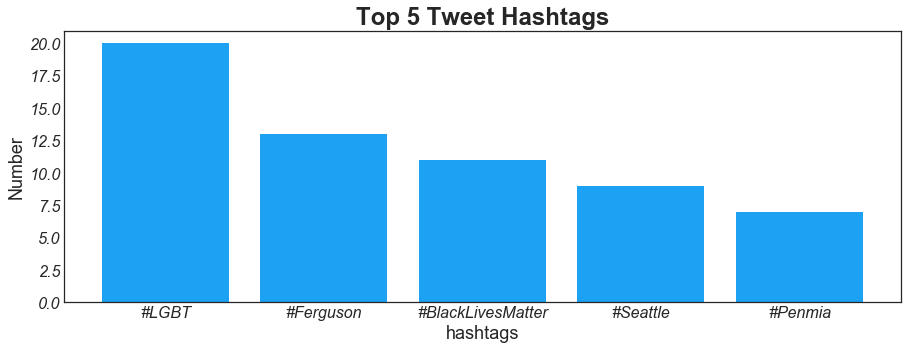

In [34]:
hashtags, hashtags_int, values = twitter.hashtag_clean(tweets_df)
top_5_hashtags = plotters.plot(hashtags, values, hashtags_int, 'hashtags', 'Number', 'Top 5 Tweet Hashtags', (15, 5), 'Green', '-T')
plt.show()

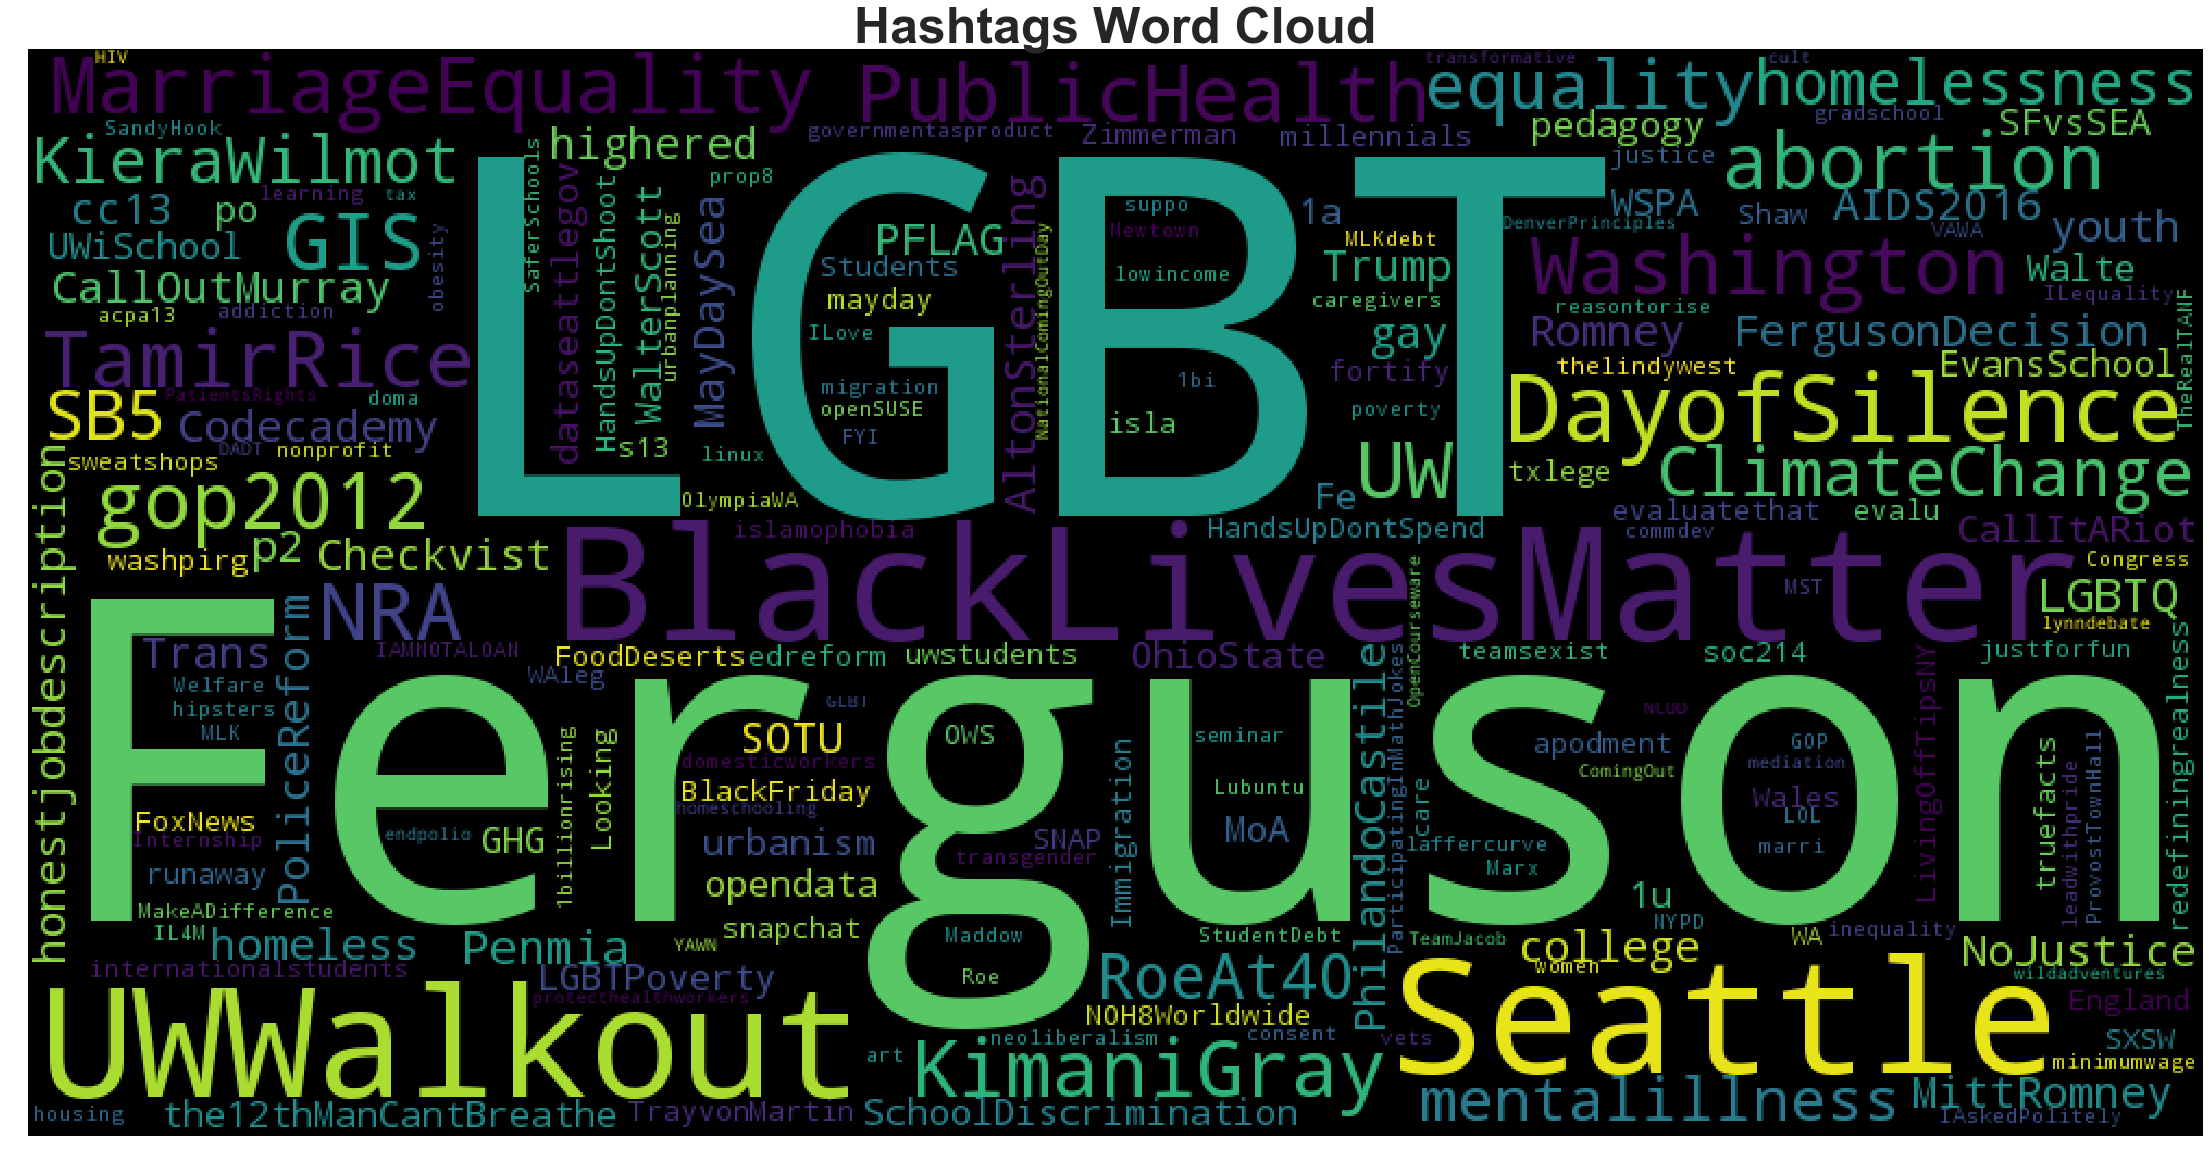

In [35]:
tweet_wordcloud = plotters.plot_wc(hashtags)
plt.show()

### Analyze sentiments of tweets

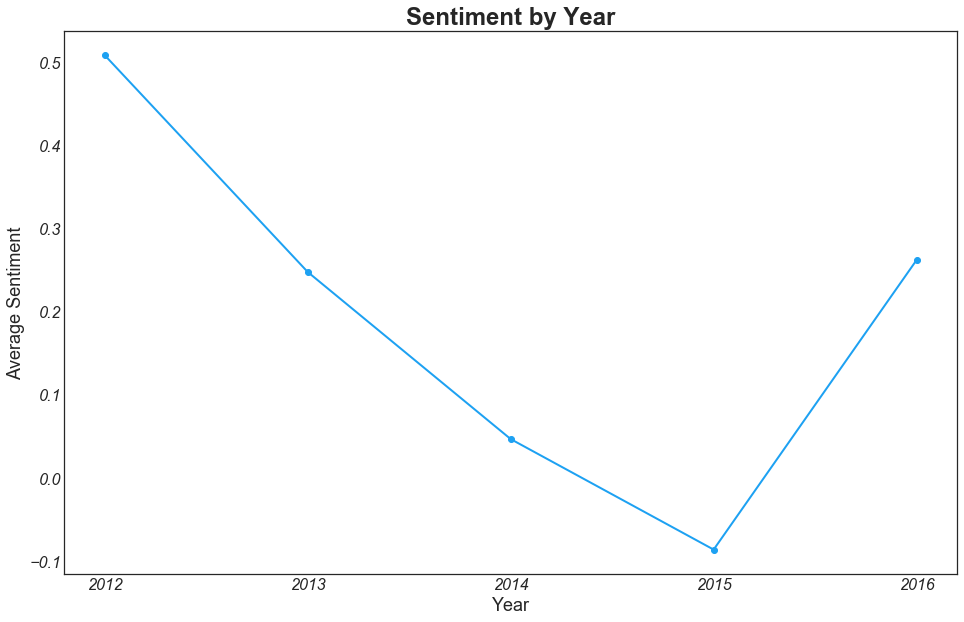

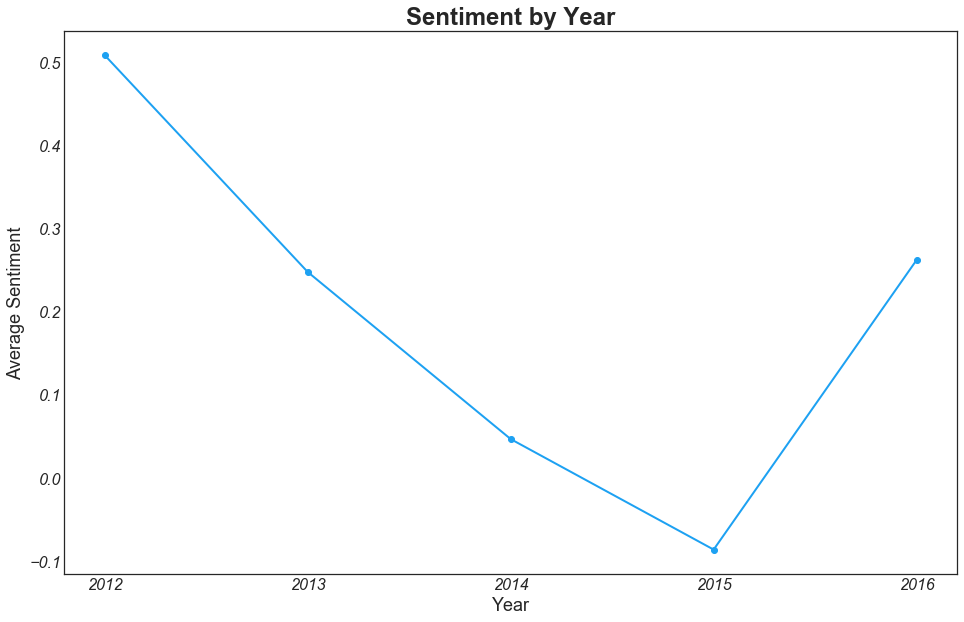

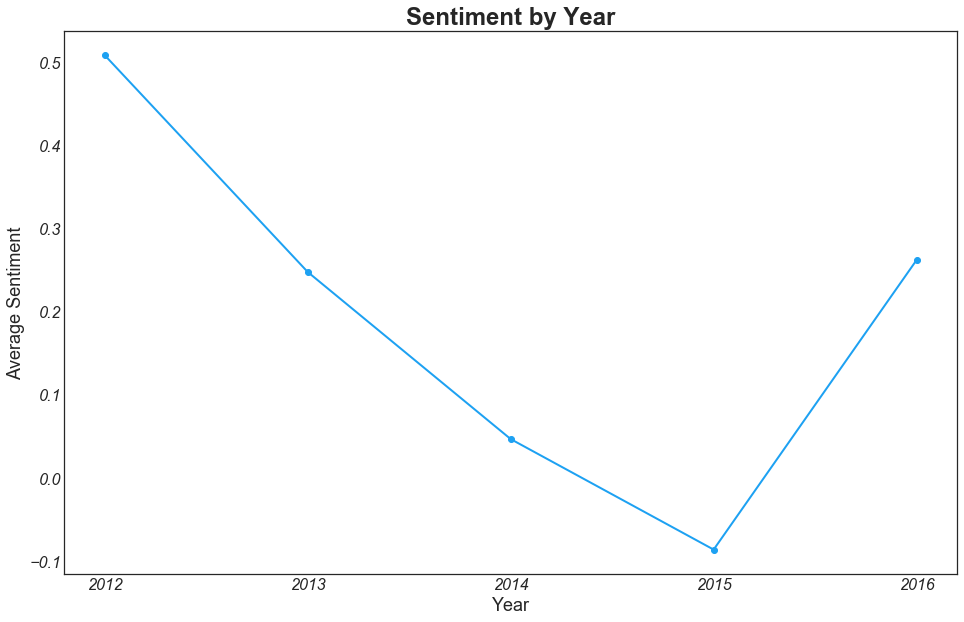

In [38]:
scores_dict = twitter.sentiment_dict('example data/AFINN-111.txt')
sentiments = twitter.tweet_score(tweets, scores_dict, tweets_df)
sent_plot = plotters.plot_sentiment(sentiments)
plt.show()